# EDA (Exploratory Data Analysis) with graphics

## Imports & settings

In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.dpi"] = 300


# Find root automatically
root = Path.cwd()
while root.name != "5CCSAMLF-CW1":
    if root.parent == root:
        raise RuntimeError("5CCSAMLF-CW1 folder not found. Make sure you are inside the 5CCSAMLF-CW1 folder.")
    root = root.parent


FIG_DIR = root / "report" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

TRAIN_PATH = root / "data" / "CW1_train.csv"
TEST_PATH  = root / "data" / "CW1_test.csv"


## Load data

In [3]:
trn = pd.read_csv(TRAIN_PATH)
tst = pd.read_csv(TEST_PATH)

print("Train shape:", trn.shape)
print("Test shape: ", tst.shape)

display(trn.head())
display(tst.head())


Train shape: (10000, 31)
Test shape:  (1000, 30)


,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


,carat,cut,color,clarity,depth,table,price,x,y,z,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,0.39,Ideal,I,VVS2,60.8,56.0,849,4.74,4.76,2.89,...,-0.321856,0.779133,0.146287,-0.658241,-1.899234,-0.973046,-0.145955,-0.597933,0.915728,0.498678
1,1.02,Premium,H,VS1,62.1,59.0,5569,6.43,6.38,3.98,...,0.249352,-0.698167,0.499753,0.524907,-0.672549,-0.505678,-2.761345,-2.434193,-1.303742,-1.239320
2,0.74,Ideal,G,SI1,61.6,55.0,2760,5.80,5.85,3.59,...,-0.353650,1.057552,1.111710,2.888994,1.489588,0.456911,-0.010021,-1.211698,0.781882,-0.327432
3,0.50,Ideal,G,VVS2,62.3,56.0,1935,5.09,5.05,3.16,...,0.822115,-0.663203,-0.500939,-1.383690,-1.828773,-1.344145,-1.411683,-1.866323,-2.157749,0.341636
4,1.04,Good,E,SI1,63.8,58.0,5766,6.46,6.39,4.10,...,0.600818,-0.187732,0.239685,0.790332,0.619964,-0.182362,1.342525,1.032296,1.402299,1.165052


## Basic schema checks

In [4]:
target = "outcome"
categorical_cols = ["cut", "color", "clarity"]

assert target in trn.columns, "Target 'outcome' not found in train!"
assert target not in tst.columns, "Test should NOT contain 'outcome'!"

print("Train columns:", len(trn.columns))
print("Test columns: ", len(tst.columns))

print("\nTrain dtypes:")
display(trn.dtypes.value_counts())
display(trn.dtypes)

print("\nMissing values (train):")
display(trn.isna().sum().sort_values(ascending=False).head(20))

print("\nMissing values (test):")
display(tst.isna().sum().sort_values(ascending=False).head(20))


Train columns: 31
Test columns:  30

Train dtypes:


float64    27
str         3
int64       1
Name: count, dtype: int64

outcome    float64
carat      float64
cut            str
color          str
clarity        str
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
a1         float64
a2         float64
a3         float64
a4         float64
a5         float64
b1         float64
b2         float64
b3         float64
b4         float64
b5         float64
a6         float64
a7         float64
a8         float64
a9         float64
a10        float64
b6         float64
b7         float64
b8         float64
b9         float64
b10        float64
dtype: object


Missing values (train):


outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
dtype: int64


Missing values (test):


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
dtype: int64

## Quick descriptive stats

In [5]:
display(trn.describe(include="all").T.head(30))


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
outcome,10000.0,NaN,NaN,NaN,-4.979081,12.722224,-44.879471,-13.989962,-5.442794,3.918593,39.675966
carat,10000.0,NaN,NaN,NaN,0.798407,0.472046,0.2,0.4,0.71,1.04,4.0
cut,10000,5,Ideal,4040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,10000,7,G,2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,10000,8,SI1,2408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,10000.0,NaN,NaN,NaN,61.74806,1.429631,50.8,61.0,61.9,62.5,70.5
table,10000.0,NaN,NaN,NaN,57.46736,2.247036,44.0,56.0,57.0,59.0,73.0
price,10000.0,NaN,NaN,NaN,3910.8419,3940.369616,326.0,965.0,2441.0,5226.0,18791.0
x,10000.0,NaN,NaN,NaN,5.733974,1.11485,0.0,4.73,5.7,6.53,10.01
y,10000.0,NaN,NaN,NaN,5.741665,1.228057,0.0,4.74,5.72,6.53,58.9


## Identify numeric columns

In [6]:
numeric_cols = [c for c in trn.columns if c not in categorical_cols + [target]]
num_train = trn[numeric_cols]
num_test  = tst[numeric_cols]

print("Numeric feature count:", len(numeric_cols))
print("Categorical features:", categorical_cols)


Numeric feature count: 27
Categorical features: ['cut', 'color', 'clarity']


## Duplicate rows check

In [7]:
dup_count = trn.duplicated().sum()
print("Duplicate rows in train:", dup_count)


Duplicate rows in train: 0


## Target (outcome) distribution

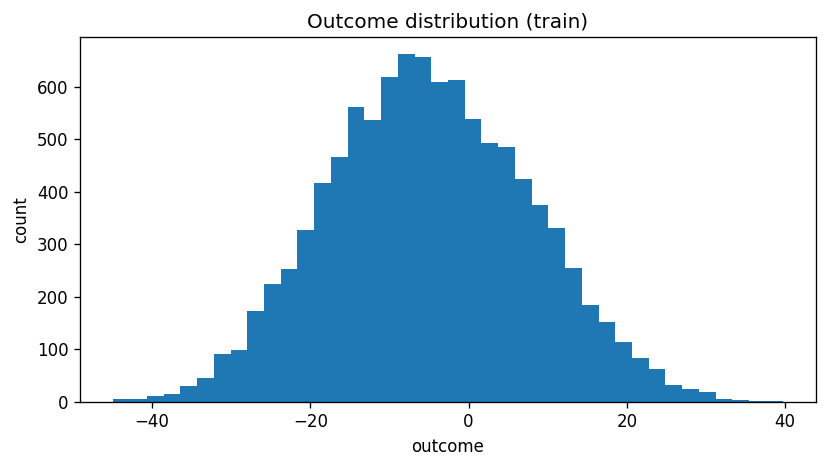

Outcome summary:


count    10000.000000
mean        -4.979081
std         12.722224
min        -44.879471
25%        -13.989962
50%         -5.442794
75%          3.918593
max         39.675966
Name: outcome, dtype: float64

Skew: 0.08308036407935626


In [8]:
y = trn[target]

plt.figure(figsize=(7,4))
plt.hist(y, bins=40)
plt.title("Outcome distribution (train)")
plt.xlabel("outcome")
plt.ylabel("count")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "outcome_hist.png"))
plt.show()

print("Outcome summary:")
display(y.describe())
print("Skew:", y.skew())


## Categorical distributions + check levels in train vs test

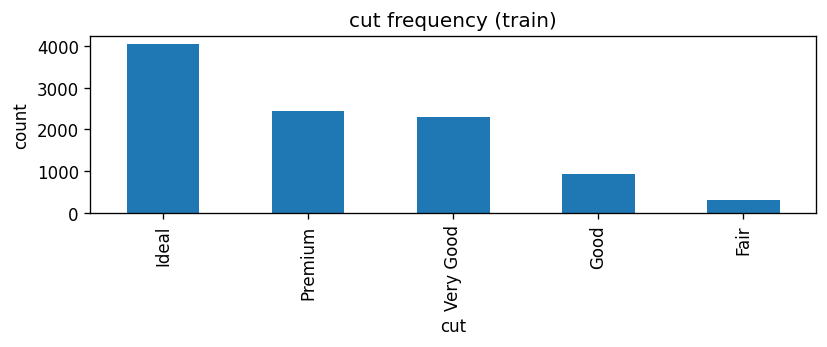


[cut] levels: train=5 test=5


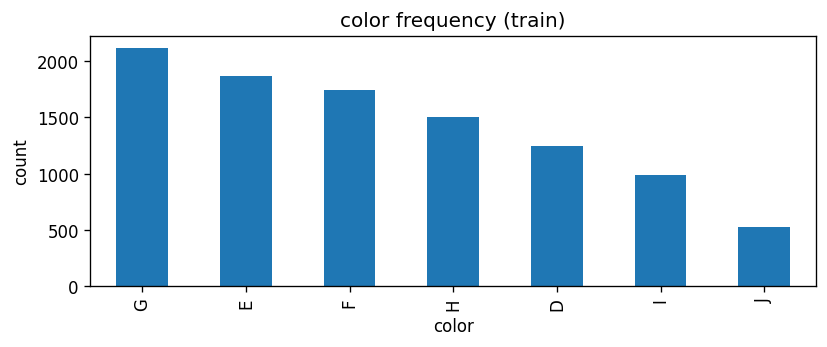


[color] levels: train=7 test=7


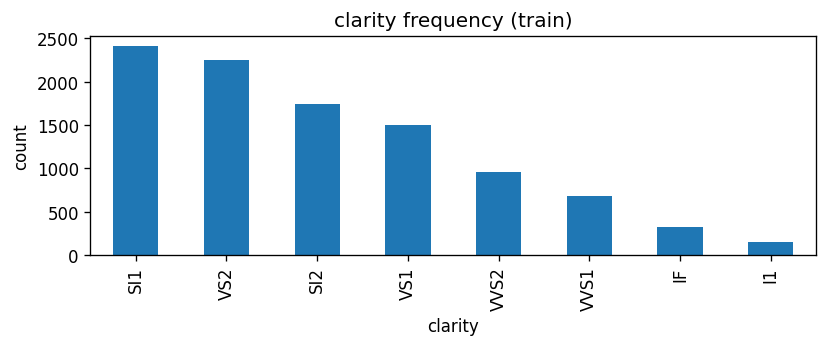


[clarity] levels: train=8 test=8


In [9]:
for c in categorical_cols:
    plt.figure(figsize=(7,3))
    trn[c].value_counts().plot(kind="bar")
    plt.title(f"{c} frequency (train)")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, f"{c}_freq_train.png"))
    plt.show()

    train_levels = set(trn[c].dropna().unique())
    test_levels  = set(tst[c].dropna().unique())
    only_in_train = sorted(list(train_levels - test_levels))
    only_in_test  = sorted(list(test_levels - train_levels))

    print(f"\n[{c}] levels: train={len(train_levels)} test={len(test_levels)}")
    if only_in_train:
        print("  Levels only in TRAIN:", only_in_train)
    if only_in_test:
        print("  Levels only in TEST :", only_in_test)


## Outcome by category (boxplots)

C:\Users\TAO\AppData\Local\Temp\ipykernel_3116\3068652995.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


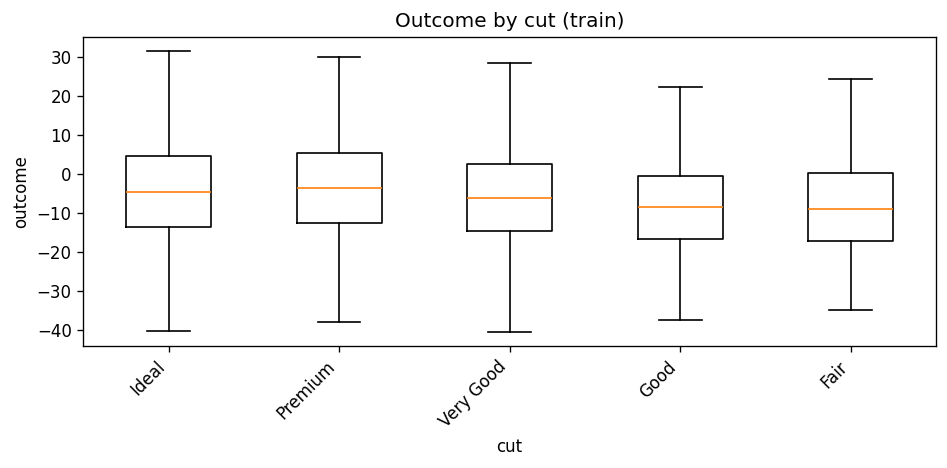

C:\Users\TAO\AppData\Local\Temp\ipykernel_3116\3068652995.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


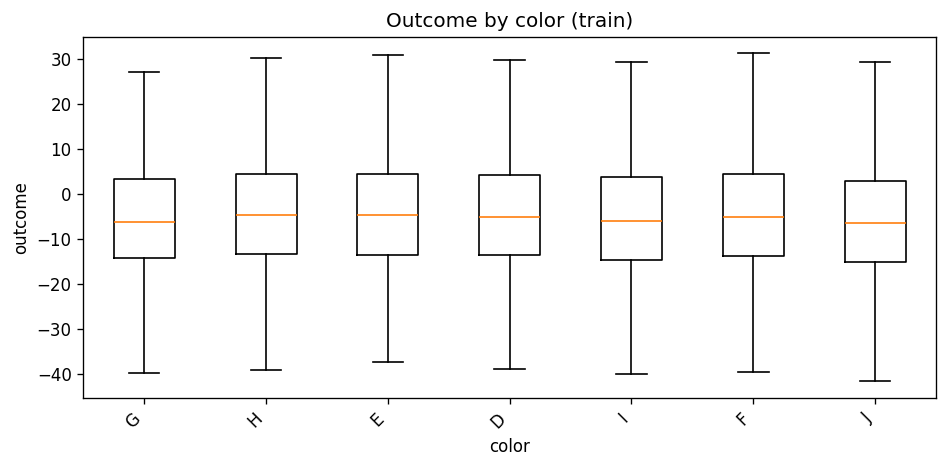

C:\Users\TAO\AppData\Local\Temp\ipykernel_3116\3068652995.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


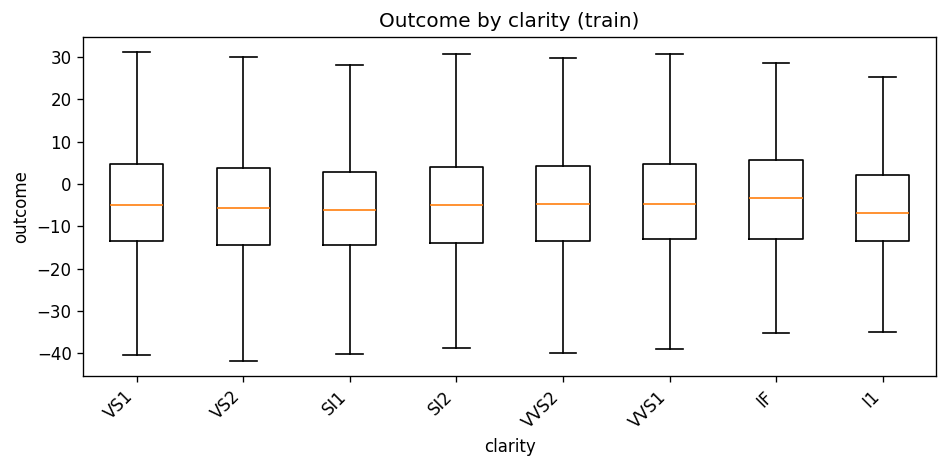

In [10]:
for c in categorical_cols:
    groups = [trn.loc[trn[c] == level, target].values for level in trn[c].dropna().unique()]
    labels = list(trn[c].dropna().unique())

    plt.figure(figsize=(8,4))
    plt.boxplot(groups, labels=labels, showfliers=False)
    plt.title(f"Outcome by {c} (train)")
    plt.xlabel(c)
    plt.ylabel("outcome")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, f"outcome_by_{c}_box.png"))
    plt.show()


## Numeric feature distributions (hist grid)

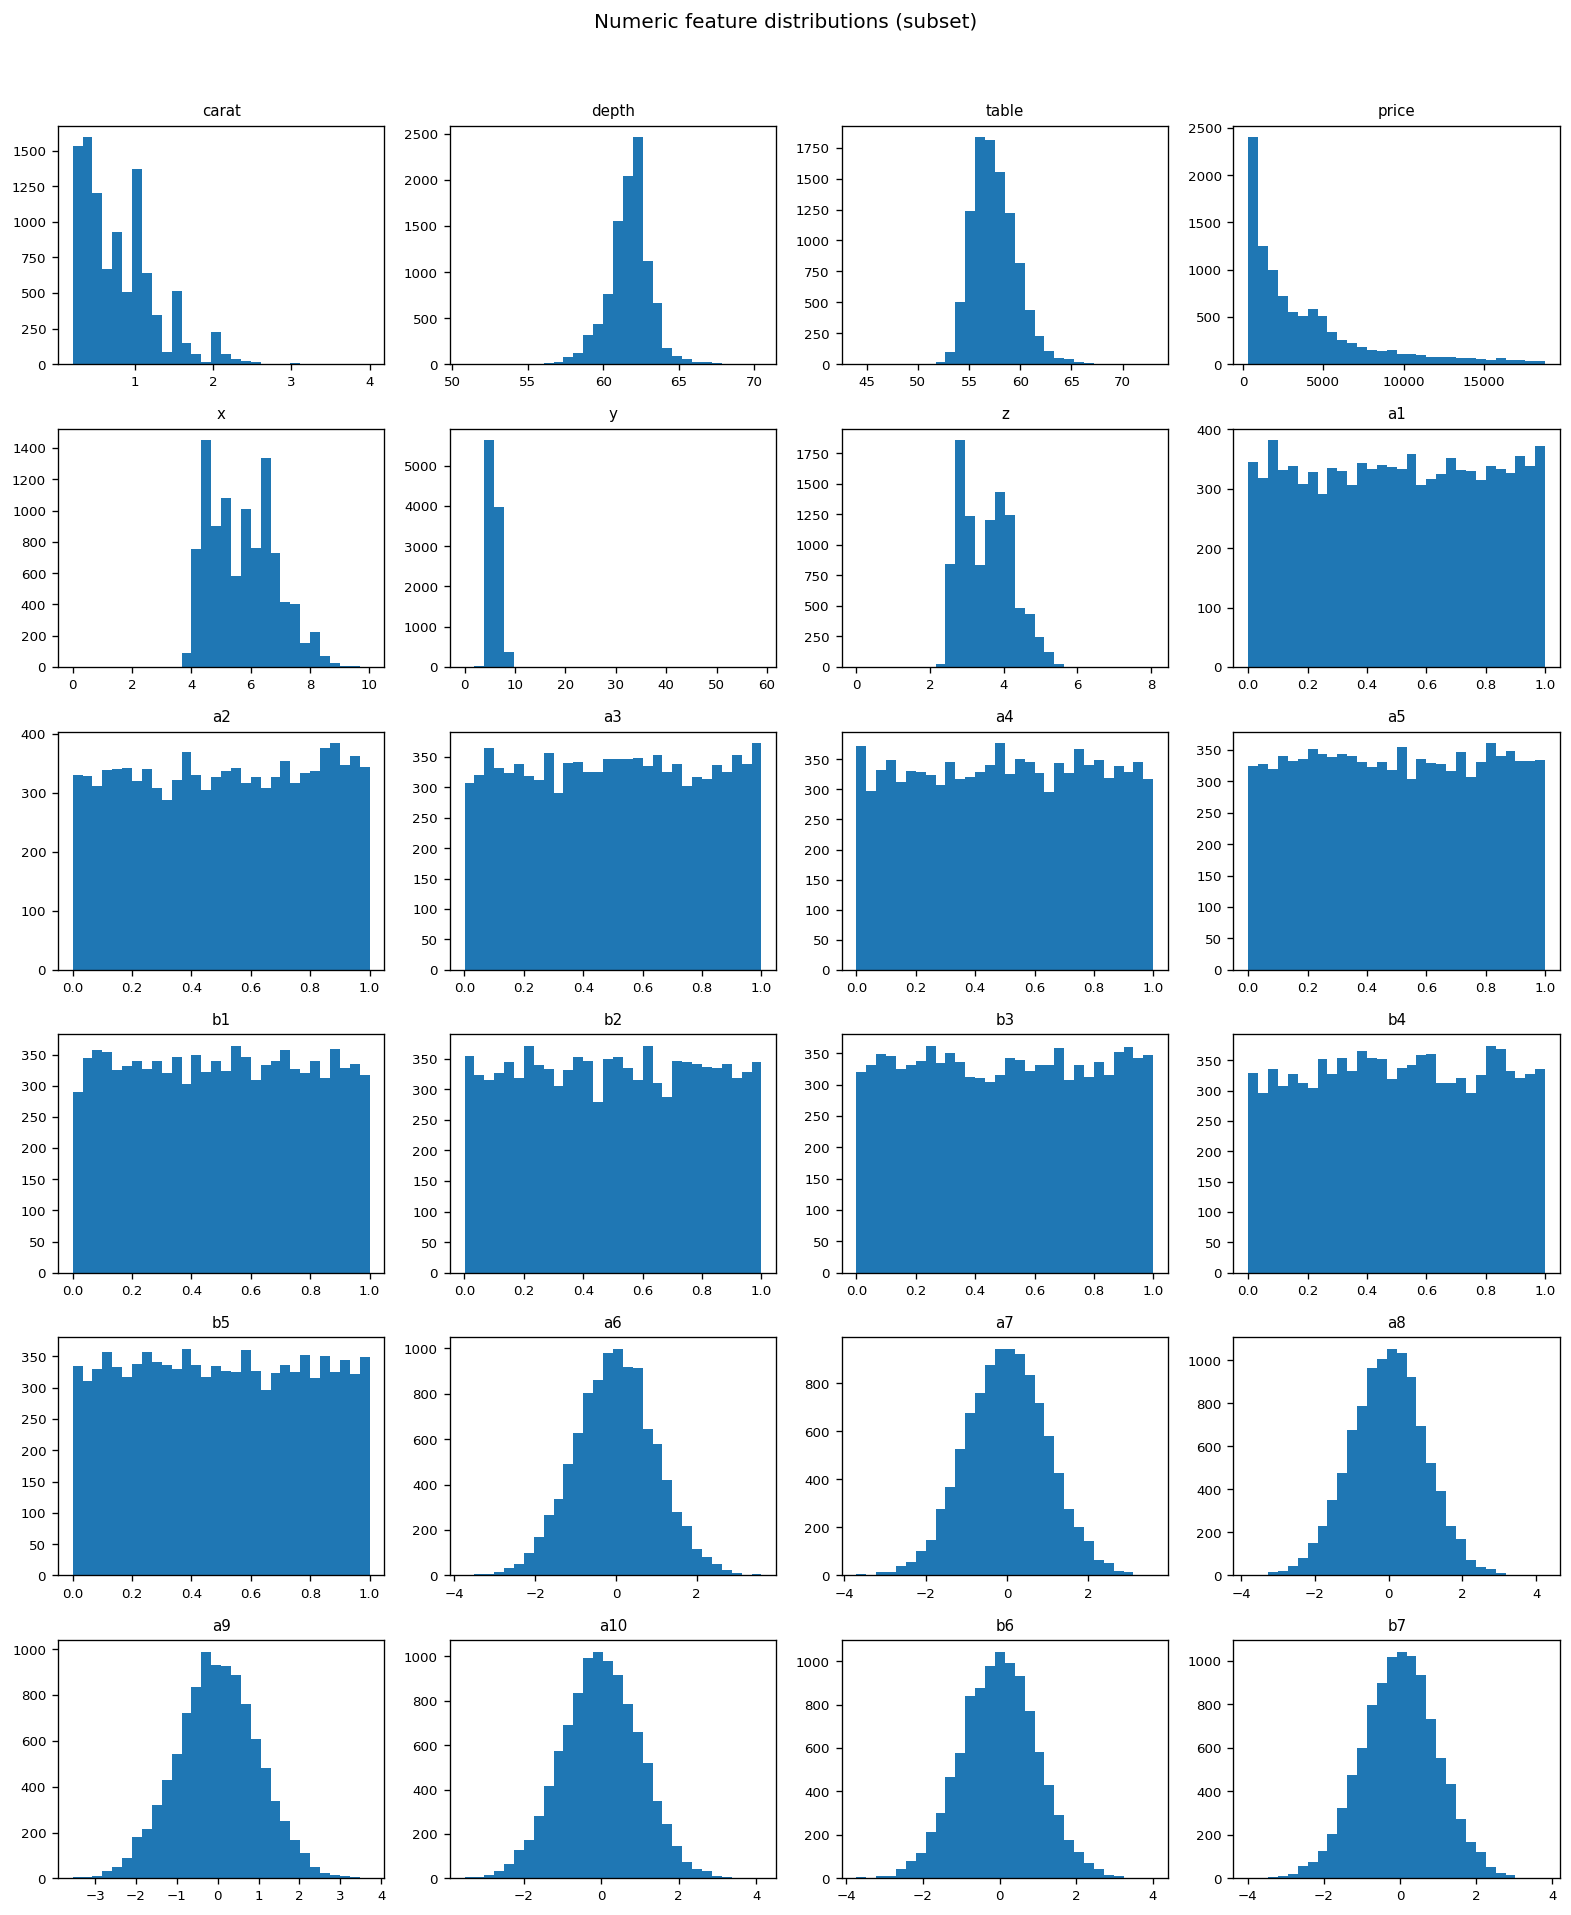

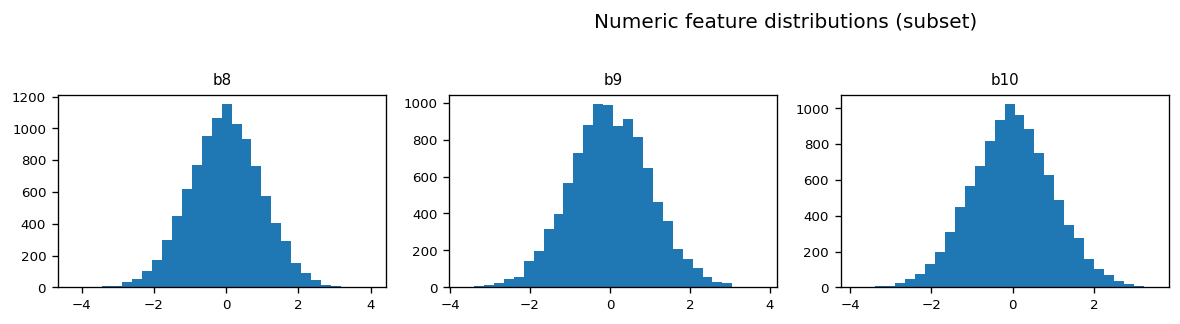

In [ ]:
def hist_grid(df, cols, ncols=4, bins=30, title_prefix="", save_name=None):
    n = len(cols)
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(ncols*3.3, nrows*2.6))
    for i, col in enumerate(cols, 1):
        ax = plt.subplot(nrows, ncols, i)
        ax.hist(df[col].dropna(), bins=bins)
        ax.set_title(col, fontsize=9)
        ax.tick_params(labelsize=8)
    plt.suptitle(title_prefix, y=1.02)
    plt.tight_layout()
    if save_name:
        plt.savefig(os.path.join(FIG_DIR, save_name), bbox_inches="tight")
    plt.show()

# First 24 numeric cols
hist_grid(num_train, numeric_cols[:24], title_prefix="Numeric feature distributions (subset)", save_name="numeric_hist_subset1.png")

# Next 24 numeric cols (if exist)
if len(numeric_cols) > 24:
    hist_grid(num_train, numeric_cols[24:48], title_prefix="Numeric feature distributions (subset)", save_name="numeric_hist_subset2.png")


## Correlation with target (numeric only)

depth   -0.411073
b3       0.225407
b1       0.173719
a1       0.149101
a4       0.122441
table    0.114977
z       -0.031470
x        0.020354
price    0.016967
y        0.015924
a7       0.012512
b5       0.012370
b10     -0.012036
b7      -0.009241
a2       0.008760
a8       0.007983
b9      -0.007324
a6       0.007238
a9       0.005361
b4      -0.003845
Name: outcome, dtype: float64

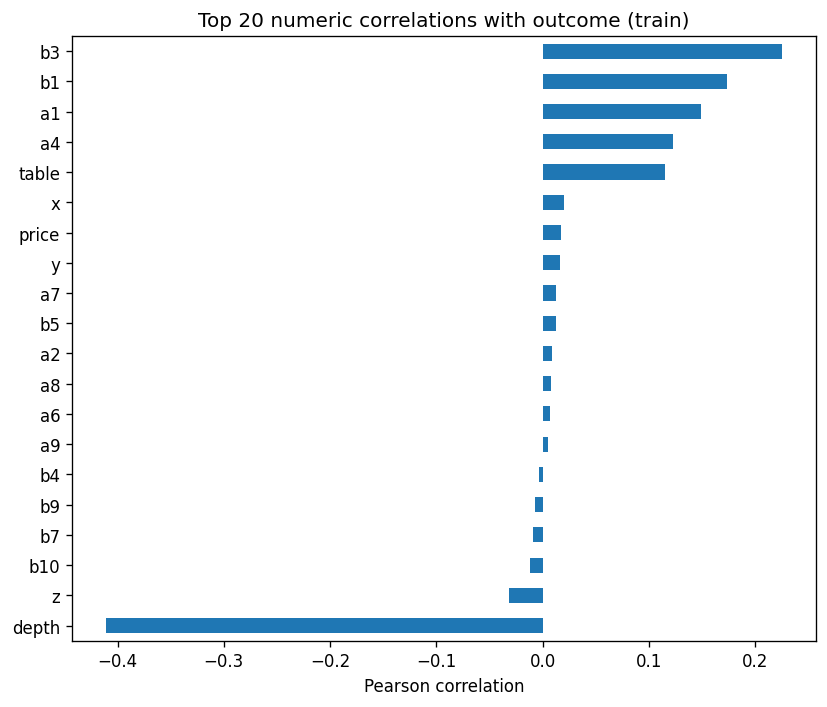

In [12]:
corr = trn[numeric_cols + [target]].corr(numeric_only=True)[target].drop(target).sort_values(key=lambda s: s.abs(), ascending=False)
display(corr.head(20))

plt.figure(figsize=(7,6))
corr.head(20).sort_values().plot(kind="barh")
plt.title("Top 20 numeric correlations with outcome (train)")
plt.xlabel("Pearson correlation")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "top_corr_with_outcome.png"))
plt.show()


## Correlation heatmap (top correlated numeric features)

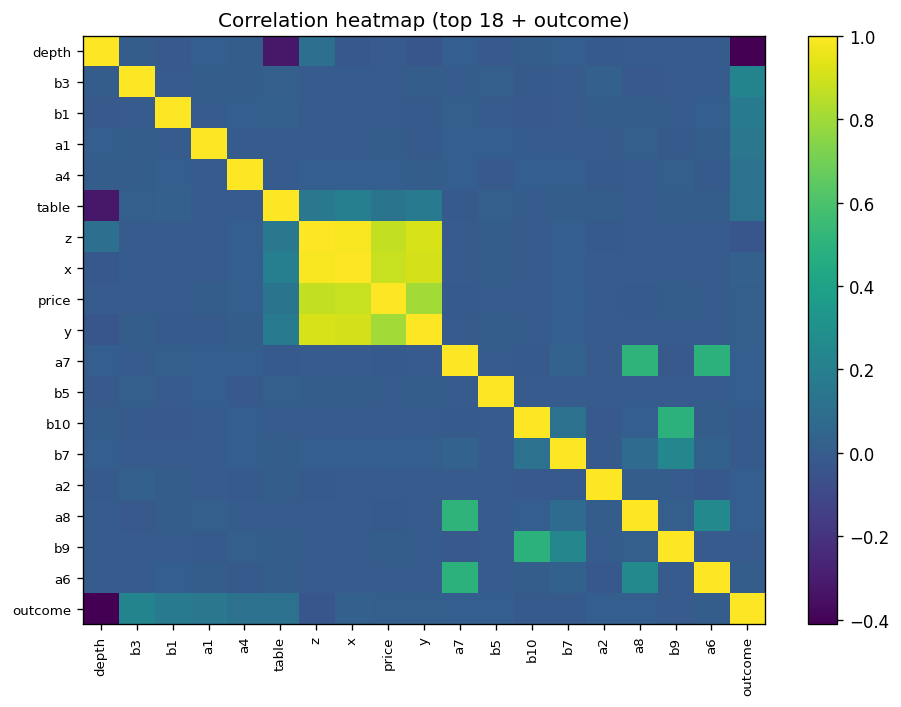

In [13]:
topN = 18
top_feats = list(corr.index[:topN])
C = trn[top_feats + [target]].corr(numeric_only=True)

plt.figure(figsize=(8,6))
plt.imshow(C.values, aspect="auto")
plt.xticks(range(len(C.columns)), C.columns, rotation=90, fontsize=8)
plt.yticks(range(len(C.index)), C.index, fontsize=8)
plt.colorbar()
plt.title(f"Correlation heatmap (top {topN} + outcome)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "corr_heatmap_top.png"))
plt.show()


## Scatter plots vs outcome for top correlated numeric features

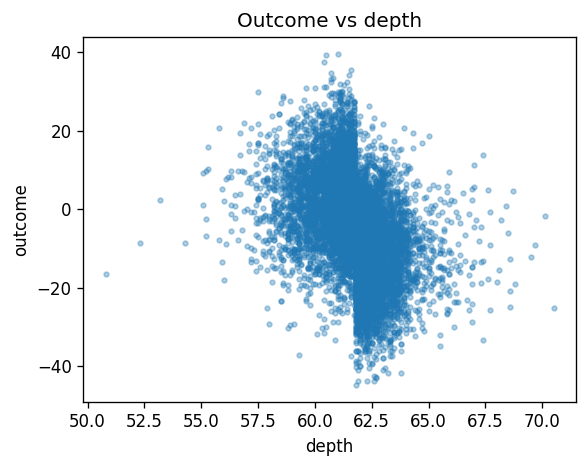

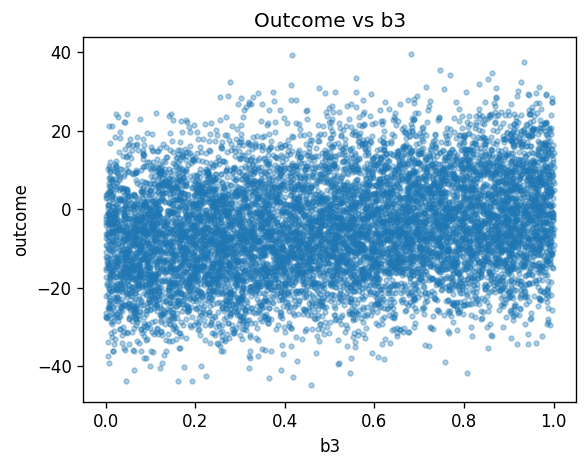

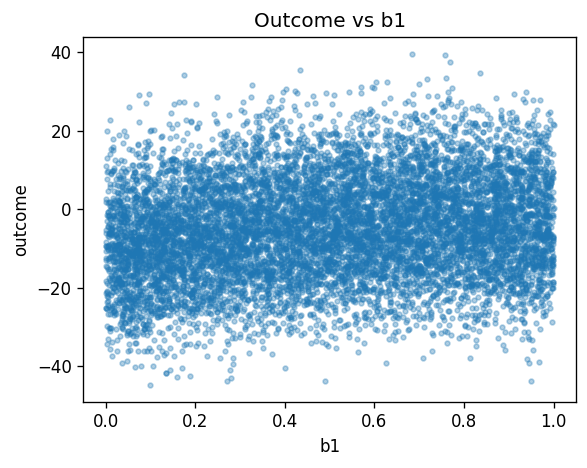

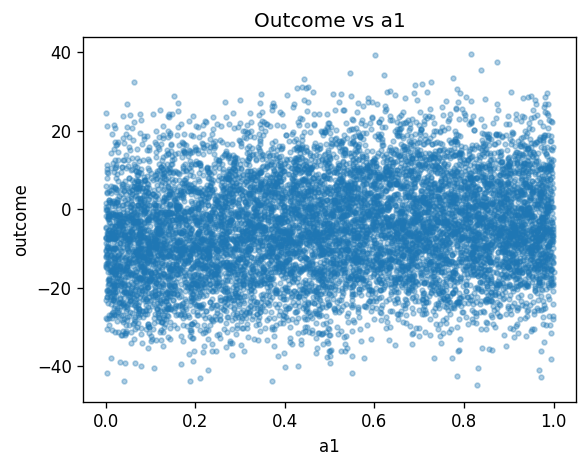

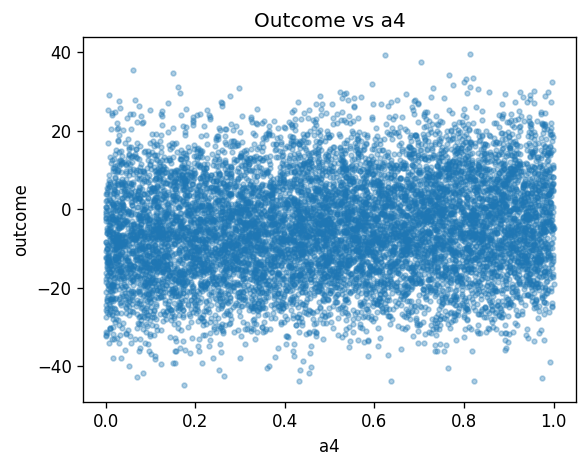

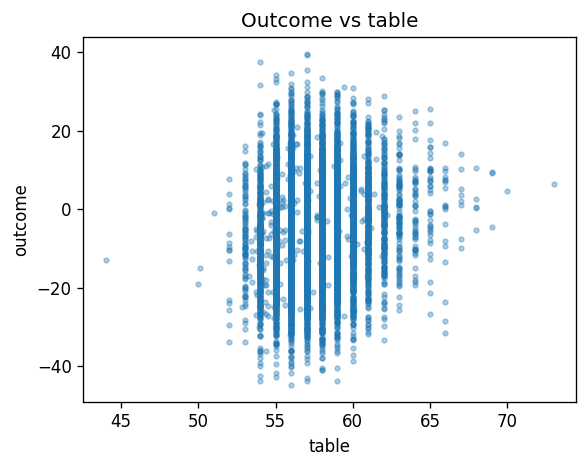

In [14]:
top_scatter = top_feats[:6]

for col in top_scatter:
    plt.figure(figsize=(5,4))
    plt.scatter(trn[col], trn[target], s=8, alpha=0.35)
    plt.title(f"Outcome vs {col}")
    plt.xlabel(col)
    plt.ylabel("outcome")
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, f"scatter_outcome_{col}.png"))
    plt.show()


## Outlier check (IQR) for key numeric variables

price    0.0676
depth    0.0461
carat    0.0333
table    0.0132
z        0.0012
x        0.0010
y        0.0009
dtype: float64

<Figure size 1080x480 with 0 Axes>

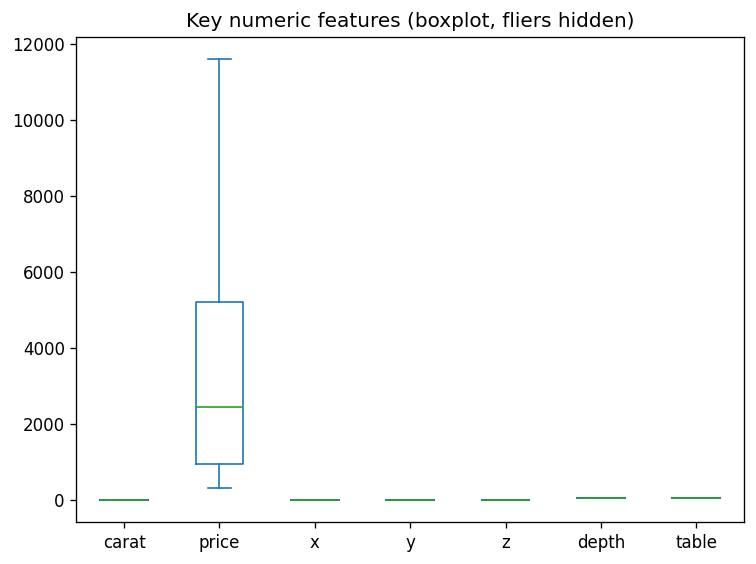

In [15]:
key_cols = ["carat", "price", "x", "y", "z", "depth", "table"]
key_cols = [c for c in key_cols if c in numeric_cols]

def iqr_outlier_rate(s: pd.Series) -> float:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    return ((s < lo) | (s > hi)).mean()

outlier_rates = {c: iqr_outlier_rate(trn[c].dropna()) for c in key_cols}
display(pd.Series(outlier_rates).sort_values(ascending=False))

# Boxplots (hide fliers for readability)
plt.figure(figsize=(9,4))
trn[key_cols].plot(kind="box", showfliers=False)
plt.title("Key numeric features (boxplot, fliers hidden)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "key_numeric_boxplots.png"))
plt.show()


## Train vs Test distribution drift check (numeric)

In [16]:
# Compare mean/std quickly; big shifts might affect generalization.
train_stats = num_train.describe().T[["mean", "std", "min", "max"]]
test_stats  = num_test.describe().T[["mean", "std", "min", "max"]]

drift = train_stats.join(test_stats, lsuffix="_train", rsuffix="_test")
drift["mean_diff"] = drift["mean_test"] - drift["mean_train"]
drift["std_diff"]  = drift["std_test"] - drift["std_train"]

display(drift.sort_values("mean_diff", key=lambda s: s.abs(), ascending=False).head(20))


,mean_train,std_train,min_train,max_train,mean_test,std_test,min_test,max_test,mean_diff,std_diff
price,3910.841900,3940.369616,326.000000,18791.000000,4064.361000,4132.866269,352.000000,18730.000000,153.519100,192.496654
table,57.467360,2.247036,44.000000,73.000000,57.628700,2.310655,53.000000,70.000000,0.161340,0.063619
a10,-0.012731,1.003570,-3.532430,4.135685,0.065722,0.994737,-3.294223,2.990629,0.078454,-0.008833
a9,-0.009286,1.010200,-3.549324,3.714985,0.052864,1.004868,-3.830829,2.988152,0.062150,-0.005332
x,5.733974,1.114850,0.000000,10.010000,5.769520,1.151964,0.000000,8.870000,0.035546,0.037114
y,5.741665,1.228057,0.000000,58.900000,5.769400,1.142767,0.000000,8.880000,0.027735,-0.085290
a6,-0.011806,0.999700,-3.750688,3.601364,0.014344,1.041402,-3.300448,3.421824,0.026150,0.041701
z,3.540757,0.692502,0.000000,8.060000,3.561440,0.714160,0.000000,5.500000,0.020683,0.021658
b7,-0.002919,0.992112,-3.987845,3.812652,-0.022997,1.008931,-3.207796,3.383308,-0.020077,0.016819
carat,0.798407,0.472046,0.200000,4.000000,0.818230,0.492002,0.230000,2.630000,0.019823,0.019956


## Train vs Test: quick overlay hist for a few important features

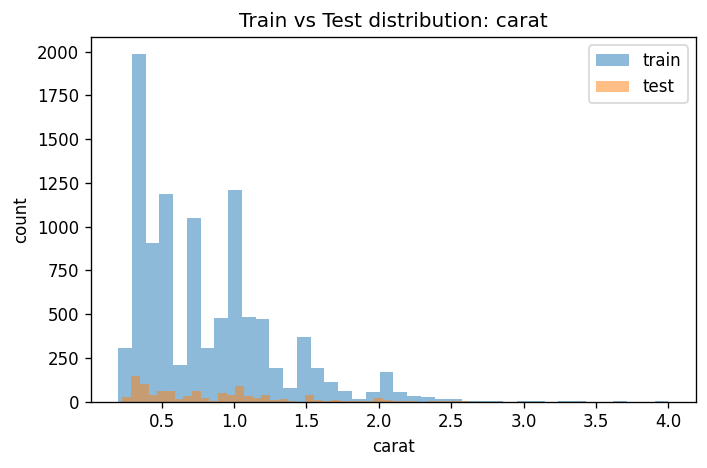

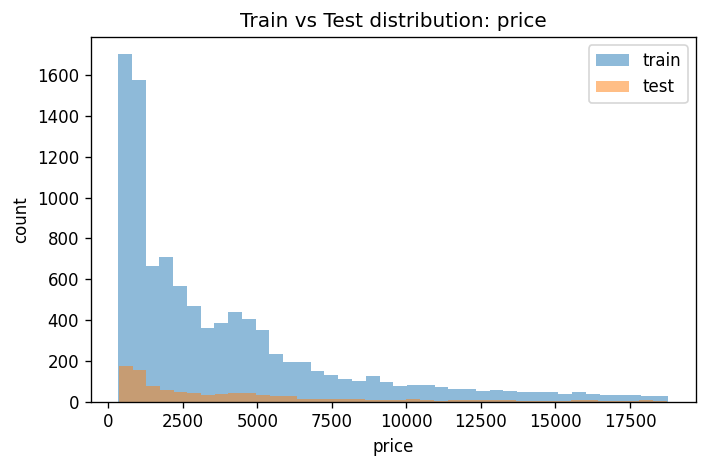

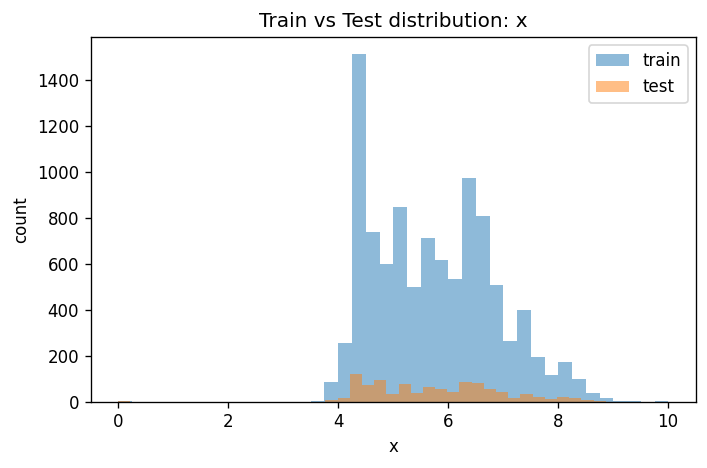

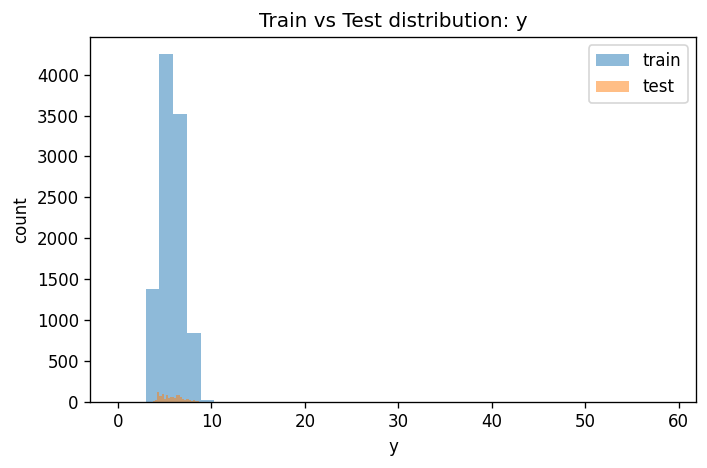

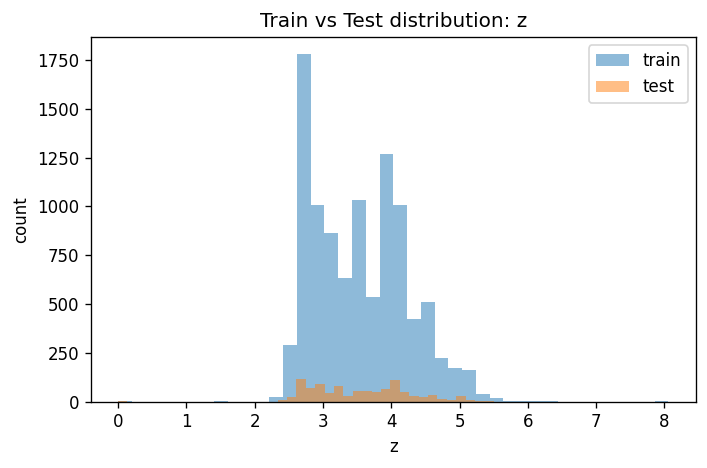

In [18]:
compare_cols = ["carat", "price", "x", "y", "z"]
compare_cols = [c for c in compare_cols if c in numeric_cols]

for c in compare_cols:
    plt.figure(figsize=(6,4))
    plt.hist(num_train[c].dropna(), bins=40, alpha=0.5, label="train")
    plt.hist(num_test[c].dropna(),  bins=40, alpha=0.5, label="test")
    plt.title(f"Train vs Test distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, f"train_vs_test_{c}.png"))
    plt.show()


## Report Helper

In [19]:
summary = {
    "train_rows": trn.shape[0],
    "train_cols": trn.shape[1],
    "test_rows": tst.shape[0],
    "test_cols": tst.shape[1],
    "missing_train_total": int(trn.isna().sum().sum()),
    "missing_test_total": int(tst.isna().sum().sum()),
    "dup_rows_train": int(trn.duplicated().sum()),
    "outcome_mean": float(trn[target].mean()),
    "outcome_std": float(trn[target].std()),
    "outcome_skew": float(trn[target].skew()),
}

print(summary)

print("\nTop 10 numeric correlations with outcome:")
display(corr.head(10))


{'train_rows': 10000, 'train_cols': 31, 'test_rows': 1000, 'test_cols': 30, 'missing_train_total': 0, 'missing_test_total': 0, 'dup_rows_train': 0, 'outcome_mean': -4.97908145098559, 'outcome_std': 12.722223542440847, 'outcome_skew': 0.08308036407935626}

Top 10 numeric correlations with outcome:


depth   -0.411073
b3       0.225407
b1       0.173719
a1       0.149101
a4       0.122441
table    0.114977
z       -0.031470
x        0.020354
price    0.016967
y        0.015924
Name: outcome, dtype: float64